In [161]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [162]:
color_target = ['#023047','#fb8500']

In [163]:
df_processed = pd.read_csv('../data/processed/job_placement.csv')
df_raw = pd.read_csv('../data/raw/jb_data.csv')

In [164]:
df_raw.shape

(215, 13)

In [165]:
df_raw.columns

Index(['gender', 'ssc_percentage', 'ssc_board', 'hsc_percentage', 'hsc_board',
       'hsc_subject', 'degree_percentage', 'undergrad_degree',
       'work_experience', 'emp_test_percentage', 'specialisation',
       'mba_percent', 'status'],
      dtype='object')

## variable target: status

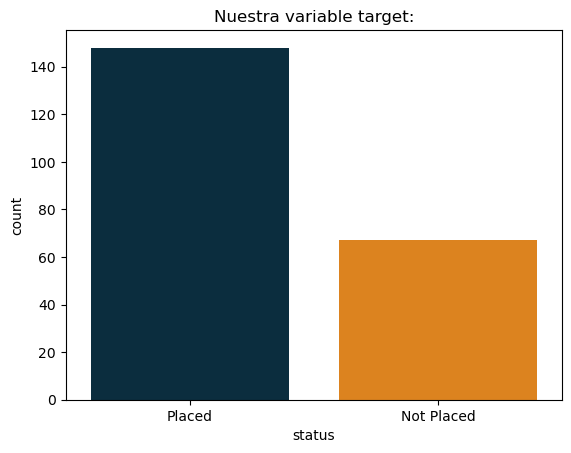

In [166]:
sns.countplot(data=df_raw,x='status',palette=color_target)
plt.title('Nuestra variable target:')
plt.show()
#not placed = 0

## Distribuciones de nuestros datos con la variable target

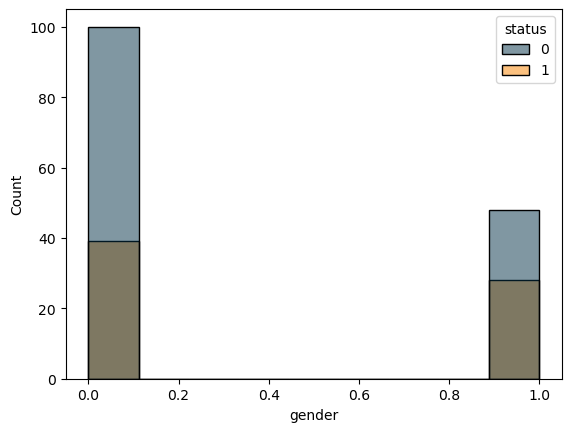

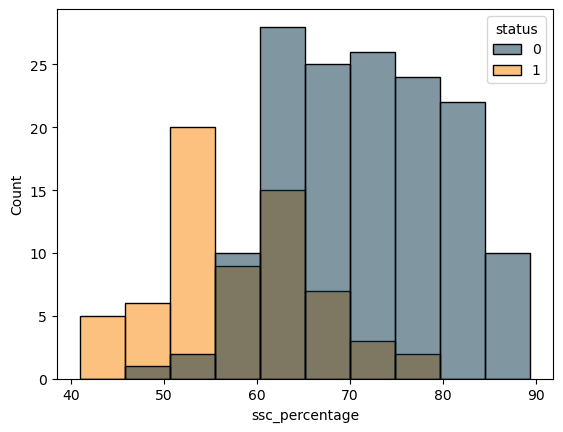

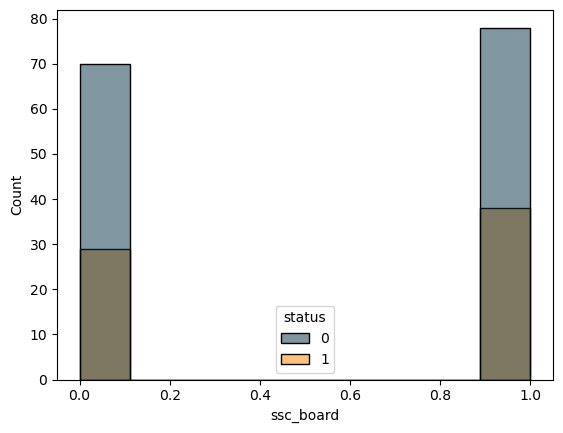

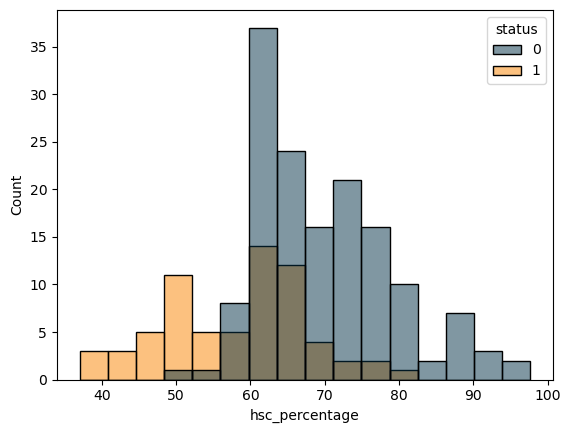

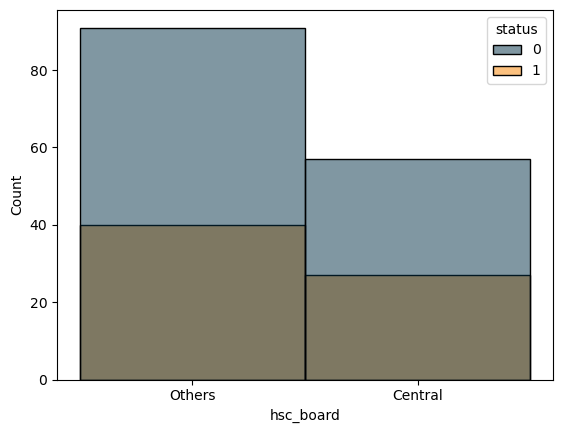

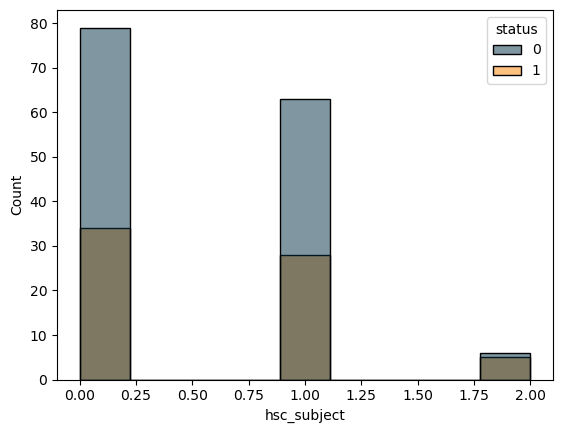

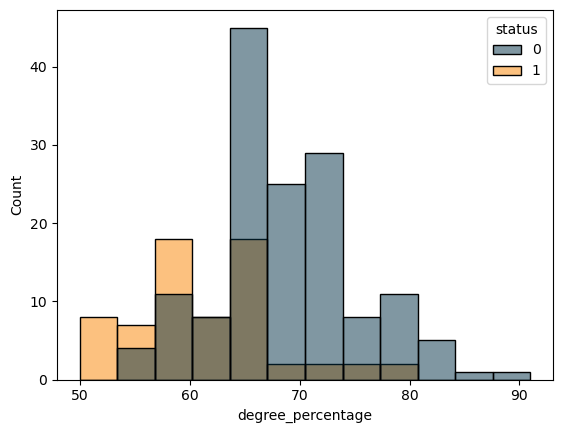

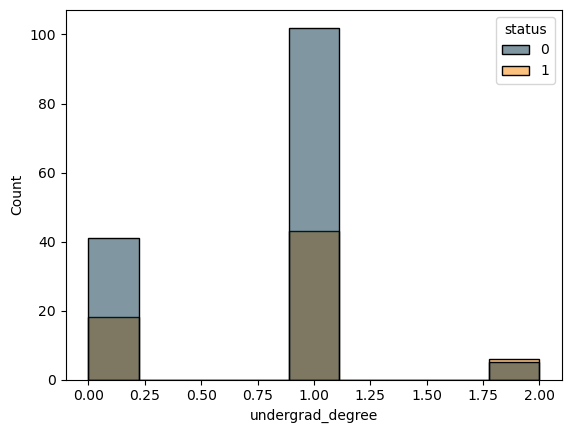

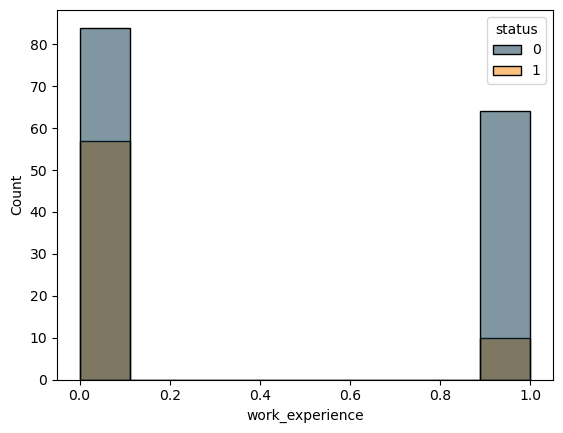

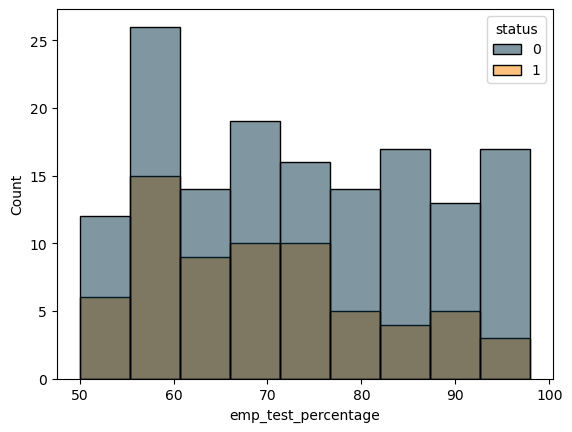

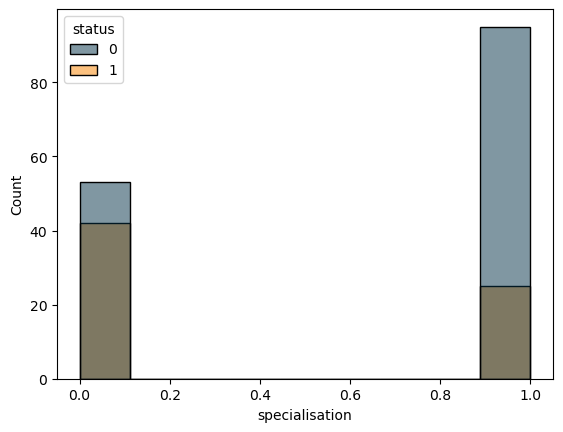

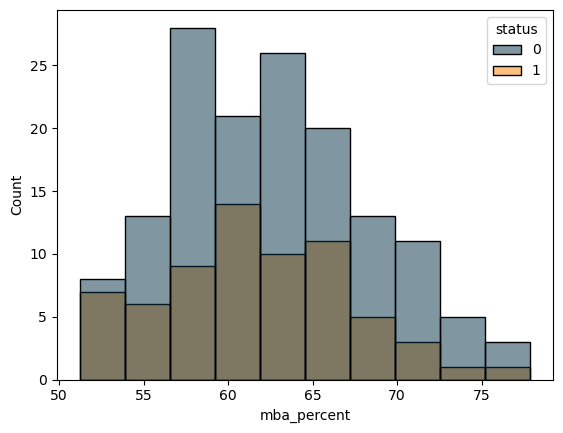

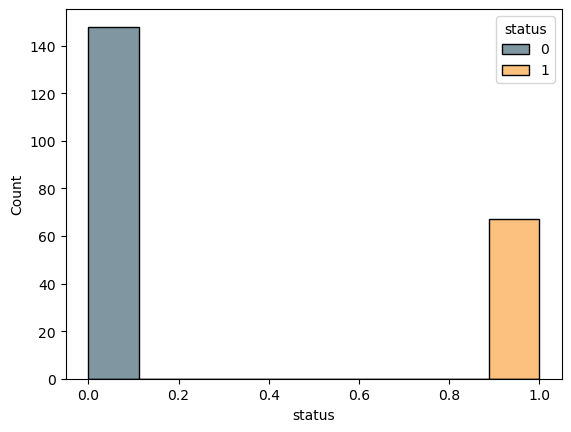

In [167]:
for feature in df_processed.columns:
    sns.histplot(data=df_processed,x=feature,hue='status',palette=color_target)
    plt.show()

## Qué variables están más correlacionadas con nuestra variable target?

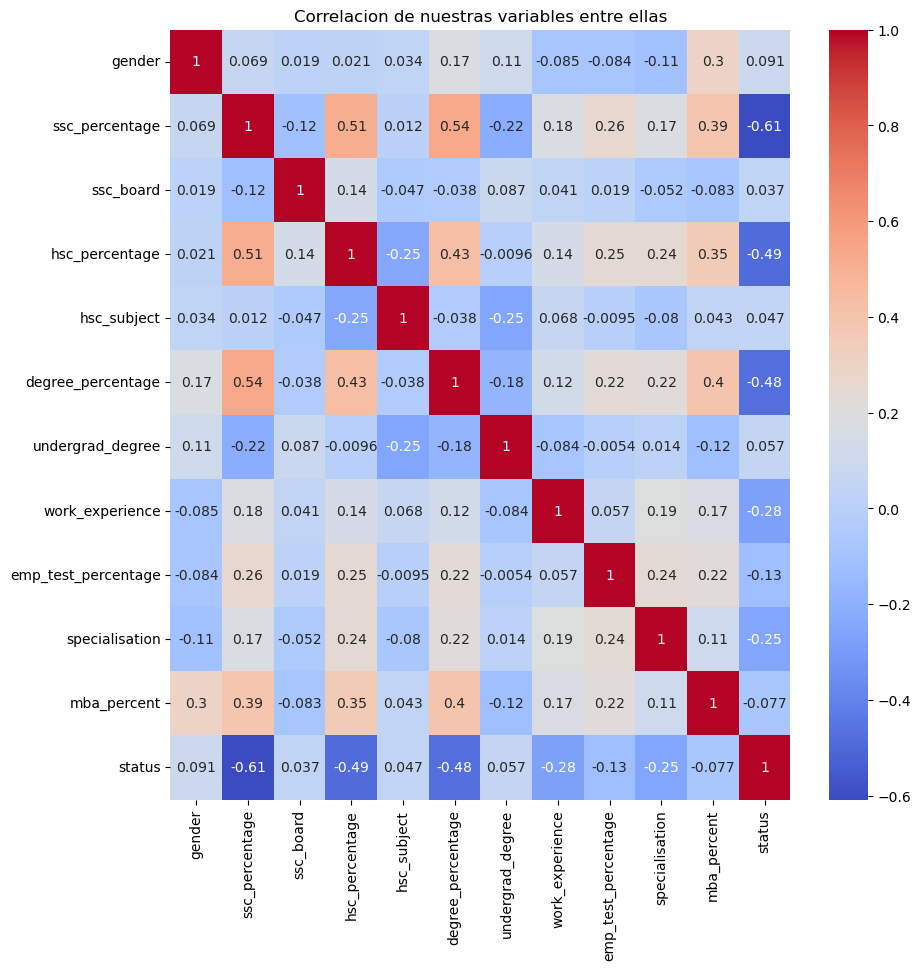

In [168]:
plt.figure(figsize=(10,10))
sns.heatmap(df_processed.select_dtypes(np.number).corr(),cmap='coolwarm',annot=True)
plt.title('Correlacion de nuestras variables entre ellas')
plt.show()

## boxplots

In [169]:
scores_studies = ['ssc_percentage','hsc_percentage','degree_percentage', 'mba_percent']

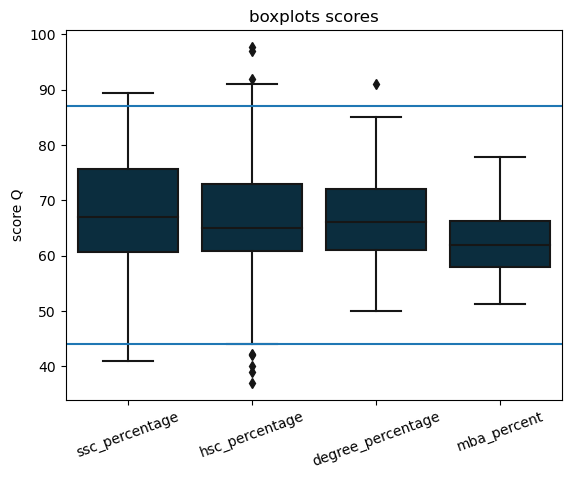

In [170]:
df_scores = df_raw[scores_studies]
sns.boxplot(data=df_scores,color='#023047')
plt.title('boxplots scores')
plt.xticks(rotation=20)
plt.ylabel('score Q')
plt.axhline(y=44)
plt.axhline(y=87)
plt.show()

#### Nota
Se encontró valores outliers en algunos scores

In [171]:
df_processed = df_processed[(df_processed['hsc_percentage']>=44) & (df_processed['hsc_percentage']<=90)]
df_processed = df_processed[df_processed['degree_percentage']<=87]

In [172]:
df_processed.to_csv(
    path_or_buf='../data/processed/jp_for_model.csv',
    index=False,
    sep=','
)